In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from pathlib import Path

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
initial_df=pd.read_csv('healthcare-dataset-stroke-data.csv')
initial_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
decision_tree_bmi = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = initial_df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

# take out missing data (NaN)
Missing = X[X.bmi.isna()]

# taking whatever's not NaN and storing them in X
X = X[~X.bmi.isna()]

# Y is the bmi we have/ know
Y = X.pop('bmi')

# fit all the Xs and Ys one after the other and transform them!  
decision_tree_bmi.fit(X,Y)
# getting the predicted bmi values
predicted_bmi = pd.Series(decision_tree_bmi.predict(Missing[['age','gender']]),index=Missing.index)

# fill in the missing bmi data
initial_df.loc[Missing.index,'bmi'] = predicted_bmi

In [4]:
initial_df=initial_df.drop('id', axis=1)
initial_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [10]:
# RUN FROM HERE 
x=initial_df.drop('stroke', axis=1)
y= initial_df['stroke']

In [11]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=1)
## Kaggle User: Yousif Abdelgabernady

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=1)

In [12]:
list= initial_df.select_dtypes(include= ['object']).columns.tolist()

In [13]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for x in list:
    le.fit(initial_df[x])
    initial_df[x]=le.transform(initial_df[x])

In [14]:
x_res,y_res= sm.fit_resample(x_train,y_train)

In [30]:
# TO HERE TWICE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score
logmodel= LogisticRegression(solver='lbfgs', random_state=1)
logmodel.fit(x_train, y_train)

c:\Users\awsom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [31]:
prediction=logmodel.predict(x_test)
print(len(prediction))

1278


In [32]:
print(logmodel.score(x_test,y_test))

0.9405320813771518


In [33]:
log_score=balanced_accuracy_score(y_test, prediction)
print(log_score)

0.5120864505403159


In [34]:
log_matrix= confusion_matrix(y_test, prediction)
print(log_matrix)

[[1200    3]
 [  73    2]]


[Text(0.5, 23.52222222222222, 'Predicted Value'),
 Text(50.722222222222214, 0.5, 'Actual Value')]

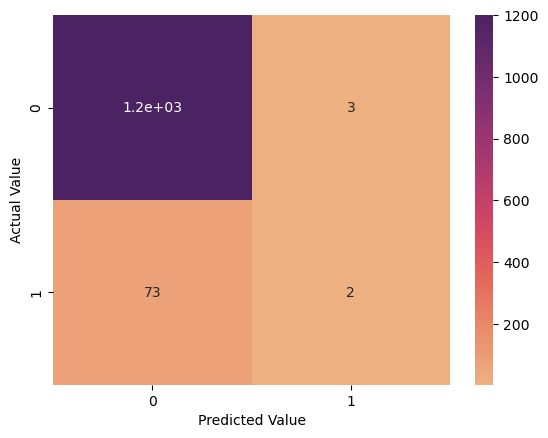

In [54]:
log_hm=sns.heatmap(log_matrix, 
            annot=True,
            cbar=True,
            cmap='flare')
log_hm.set(xlabel='Predicted Value', ylabel='Actual Value')




In [35]:
log_report= classification_report(y_test, prediction)
print(log_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1203
           1       0.40      0.03      0.05        75

    accuracy                           0.94      1278
   macro avg       0.67      0.51      0.51      1278
weighted avg       0.91      0.94      0.92      1278



In [36]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model= DecisionTreeClassifier()
dec_tree_model.fit(x_train, y_train)

print(dec_tree_model.score(x_test, y_test))

0.9061032863849765


In [37]:
dec_pred=dec_tree_model.predict(x_test)

In [57]:
dec_matrix= confusion_matrix(y_test, dec_pred)
dec_matrix

array([[1139,   64],
       [  56,   19]], dtype=int64)

[Text(0.5, 23.52222222222222, 'Predicted Value'),
 Text(50.722222222222214, 0.5, 'Actual Value')]

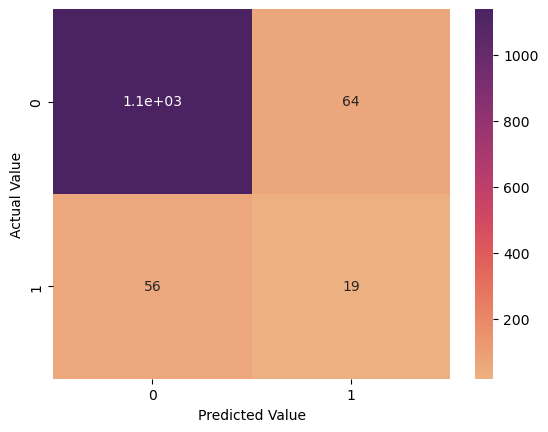

In [56]:

dec_hm=sns.heatmap(dec_matrix,
            annot=True,
            cbar=True,
            cmap='flare')
dec_hm.set(xlabel='Predicted Value', ylabel='Actual Value')

In [38]:
print(balanced_accuracy_score(y_test, dec_pred))
print(classification_report(y_test, dec_pred))

0.6000665004156276
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1203
           1       0.23      0.25      0.24        75

    accuracy                           0.91      1278
   macro avg       0.59      0.60      0.60      1278
weighted avg       0.91      0.91      0.91      1278



In [39]:
# Attempt to fine-tune decision tree. Source: datagy.io
from sklearn.model_selection import GridSearchCV
params={
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
    }
clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(x_train, y_train)
print(clf.best_params_)
# Use resulting params for dec_model

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'splitter': 'random'}


In [40]:
dec_tree_modelopt= DecisionTreeClassifier(max_depth=6, criterion='gini', max_features= 'log2', splitter='random')
dec_tree_modelopt.fit(x_res, y_res)

print(dec_tree_modelopt.score(x_test, y_test))
dec_predopt=dec_tree_model.predict(x_test)

0.662754303599374


In [58]:
dec_opt_matrix= confusion_matrix(y_test, dec_predopt)
dec_opt_matrix

array([[1139,   64],
       [  56,   19]], dtype=int64)

[Text(0.5, 23.52222222222222, 'Predicted Value'),
 Text(50.722222222222214, 0.5, 'Actual Value')]

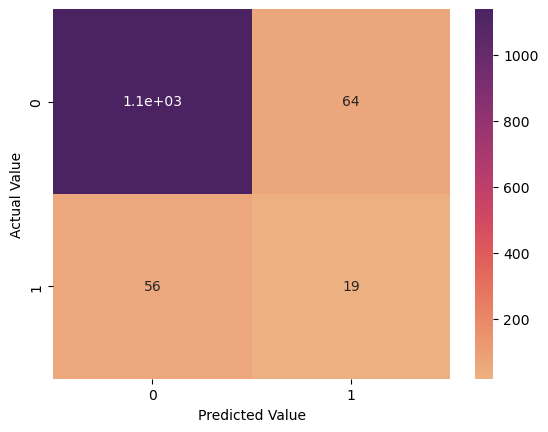

In [59]:
dec_opt_hm=sns.heatmap(dec_opt_matrix,
            annot=True,
            cbar=True,
            cmap='flare')
dec_opt_hm.set(xlabel='Predicted Value', ylabel='Actual Value')

In [41]:
print(balanced_accuracy_score(y_test, dec_predopt))
print(classification_report(y_test, dec_predopt))

0.6000665004156276
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1203
           1       0.23      0.25      0.24        75

    accuracy                           0.91      1278
   macro avg       0.59      0.60      0.60      1278
weighted avg       0.91      0.91      0.91      1278



In [42]:
## Source: Datacamp. Adaptive Boosting ** Uses DecisionTreeClassifier as base training algorithm
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=1)
ada_model.fit(x_train, y_train)


AdaBoostClassifier(learning_rate=1, n_estimators=1000, random_state=1)

In [43]:


print(ada_model.score(x_test, y_test))
ada_pred=ada_model.predict(x_test)

0.935054773082942


In [60]:
ada_matrix= confusion_matrix(y_test, ada_pred)
ada_matrix

array([[1193,   10],
       [  73,    2]], dtype=int64)

[Text(0.5, 23.52222222222222, 'Predicted Value'),
 Text(50.722222222222214, 0.5, 'Actual Value')]

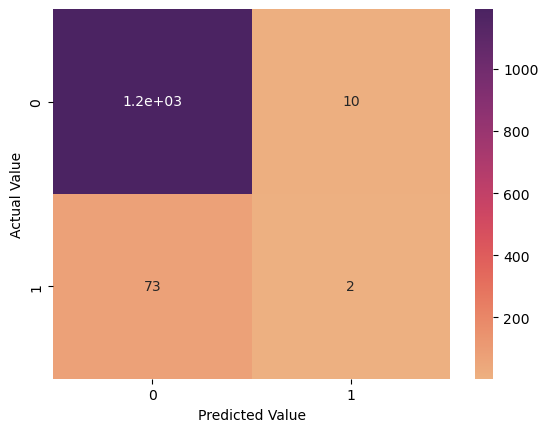

In [61]:
ada_hm=sns.heatmap(ada_matrix,
            annot=True,
            cbar=True,
            cmap='flare')
ada_hm.set(xlabel='Predicted Value', ylabel='Actual Value')

In [44]:
print(balanced_accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

0.5091770573566085
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1203
           1       0.17      0.03      0.05        75

    accuracy                           0.94      1278
   macro avg       0.55      0.51      0.51      1278
weighted avg       0.90      0.94      0.91      1278

